In [2]:
import torch, torchvision
from torchvision import transforms, datasets
import torch.utils.data

In [3]:
train = datasets.MNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

/home/mayi/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [5]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

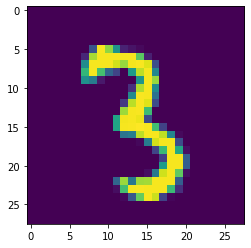

In [6]:
import matplotlib.pyplot as plt

plt.imshow(data[0][5].view(28, 28))

In [7]:
total = 0
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter[int(y)]+=1
        
counter

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
    
network = Net()
network

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [10]:
randomNumber = torch.rand(28, 28)
randomNumber

tensor([[0.2498, 0.9888, 0.5303, 0.9815, 0.1013, 0.3339, 0.6776, 0.7605, 0.3697,
         0.3091, 0.8927, 0.0314, 0.2965, 0.3480, 0.3271, 0.4333, 0.2053, 0.6448,
         0.2716, 0.6197, 0.5609, 0.5163, 0.6175, 0.4459, 0.4651, 0.6737, 0.8117,
         0.4457],
        [0.2509, 0.3059, 0.6666, 0.2089, 0.9497, 0.8156, 0.1352, 0.6535, 0.5948,
         0.7568, 0.4266, 0.1423, 0.1472, 0.3577, 0.2305, 0.0938, 0.7315, 0.1765,
         0.3849, 0.6559, 0.7722, 0.9722, 0.7957, 0.1549, 0.4858, 0.6530, 0.2936,
         0.3743],
        [0.7641, 0.1847, 0.7298, 0.8752, 0.2100, 0.2911, 0.3275, 0.2524, 0.0088,
         0.4842, 0.0178, 0.8293, 0.1951, 0.7006, 0.2874, 0.2509, 0.2248, 0.5203,
         0.7196, 0.2400, 0.6808, 0.6936, 0.5505, 0.3427, 0.4954, 0.4177, 0.0496,
         0.8584],
        [0.7633, 0.6375, 0.8876, 0.5450, 0.6037, 0.6196, 0.2028, 0.2064, 0.1919,
         0.7075, 0.3960, 0.5686, 0.4366, 0.4940, 0.3069, 0.1529, 0.2935, 0.5543,
         0.9414, 0.9868, 0.0564, 0.3339, 0.3682, 0.6868

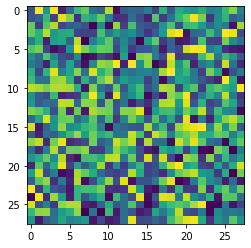

In [11]:
plt.imshow(randomNumber.view(28, 28))

In [14]:
import torch.optim as optim

optimizer = optim.Adam(network.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        network.zero_grad()
        output = network(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0991, grad_fn=<NllLossBackward>)
tensor(0.0280, grad_fn=<NllLossBackward>)
tensor(0.0899, grad_fn=<NllLossBackward>)


In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainset:
        X, y = data
        output = network(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.98
